In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sales Data.csv', encoding='unicode_escape')
#to remove encoding error we use 'unicode_escape'

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)   #removing the null datas in the dataset if any

In [10]:
df['Amount'] = df['Amount'].astype('int')   #changing the datatype of amount column into int

In [11]:
df['Amount'].dtypes

dtype('int64')

In [12]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


Exploratory Data Analysis

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

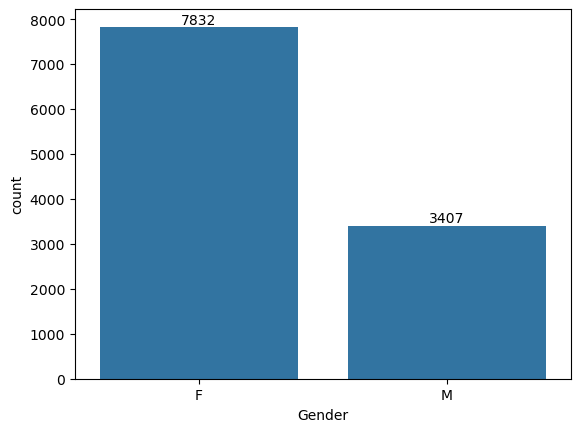

In [14]:
ax = sns.countplot(x = 'Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

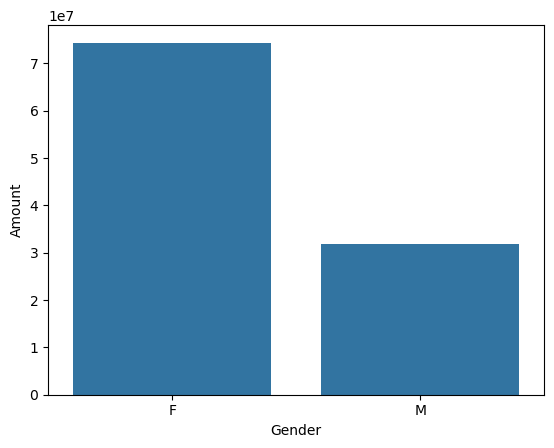

In [15]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sns.barplot(x = 'Gender', y='Amount',data = sales_gen)

Age

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

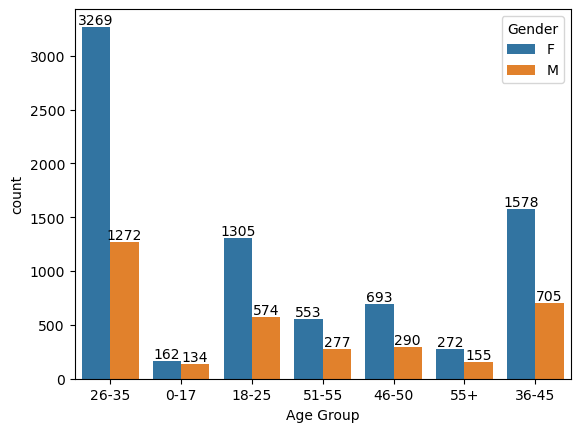

In [17]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

State(Location)

<Axes: xlabel='State', ylabel='Orders'>

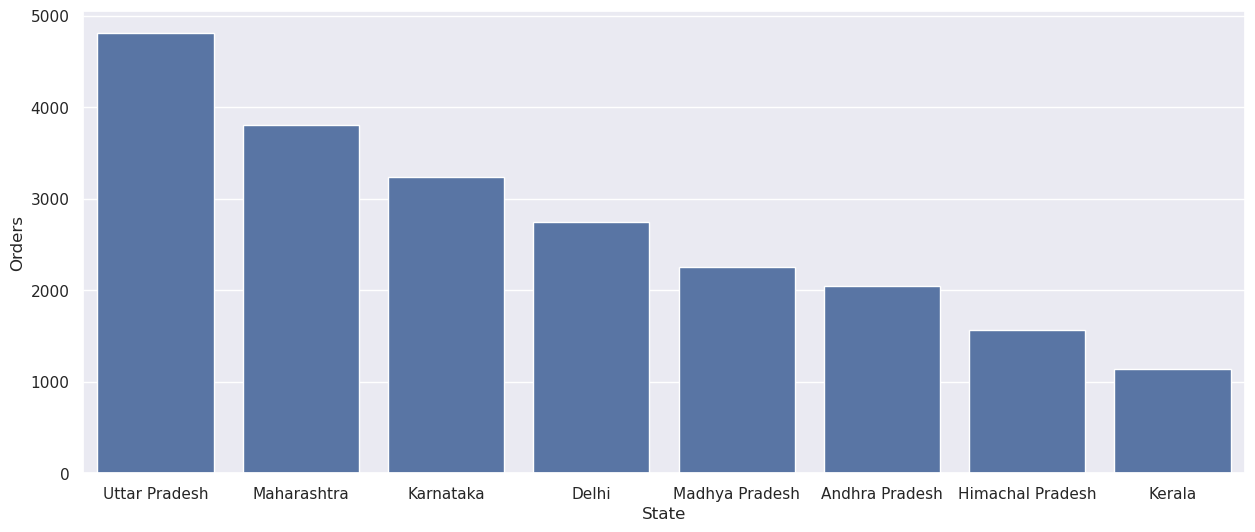

In [18]:
sales_state = df.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by='Orders',ascending = False).head(8)
#.head() is used because the graph will be difficult to understand if there are more datas and we only neeed to know 
#first 10 states that has maximum sales
sns.set(rc={'figure.figsize':(15,6)})   #this is to set the labels intact, but we can also rotate the labels 90 degrees
sns.barplot(data = sales_state, x='State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

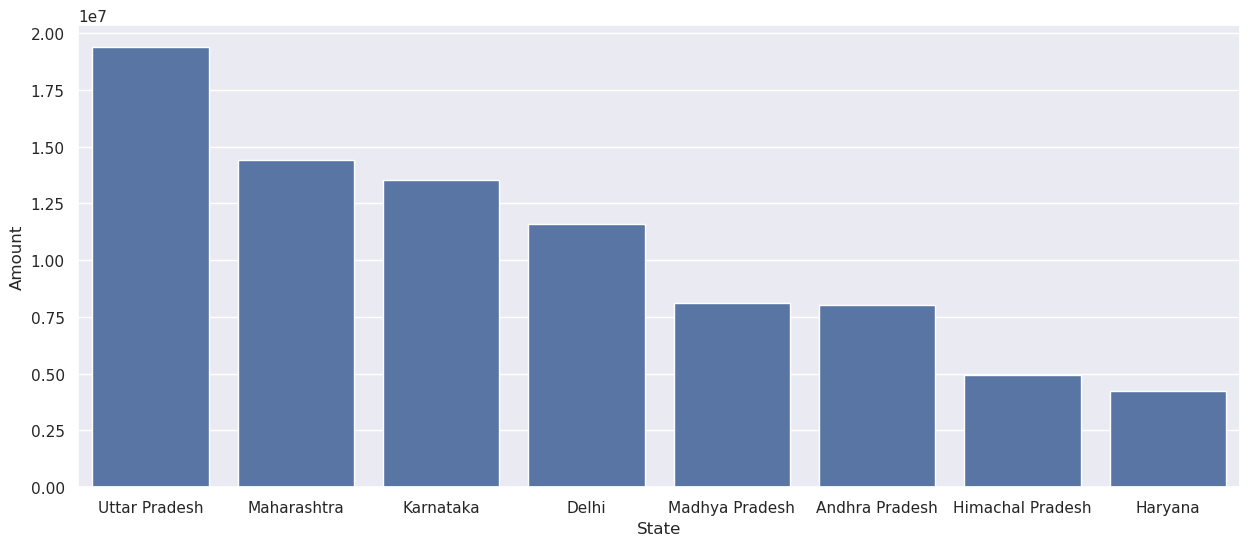

In [19]:
sales_state = df.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by='Amount',ascending = False).head(8)
sns.set(rc={'figure.figsize':(15,6)})   #this is to set the labels intact, but we can also rotate the labels 90 degrees
sns.barplot(data = sales_state, x='State', y='Amount')

From above, we can see that most of the orders were form Uttar Pradesh, Maharastra, Karnataka and respectively were the purchasing power or more sales were done by these states. But kerela was left behind in the case of purchasing power by Haryana in the 8th position.

Marital Status

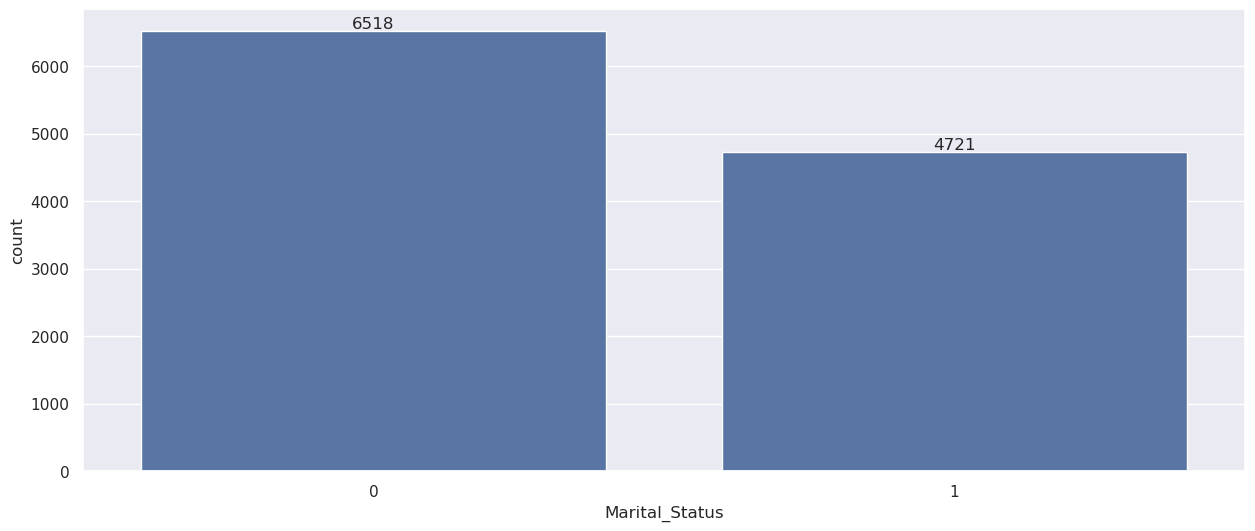

In [20]:
ax = sns.countplot(data = df, x='Marital_Status')

sns.set(rc={'figure.figsize':(1,5)})
for bars in ax.containers:
    ax.bar_label(bars)

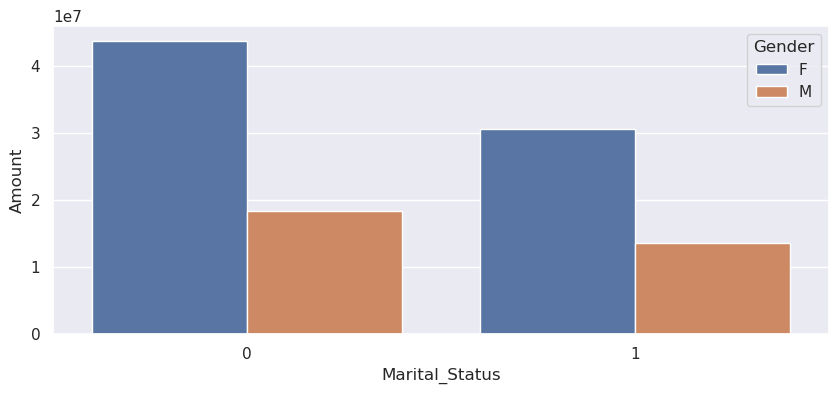

In [25]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(data = sales_state, x = 'Marital_Status', y='Amount', hue='Gender')
sns.set(rc={'figure.figsize':(5,4)})

Hence fromm the above graph we can conclude that, Un-Married women have more purchasing power 

Occupation

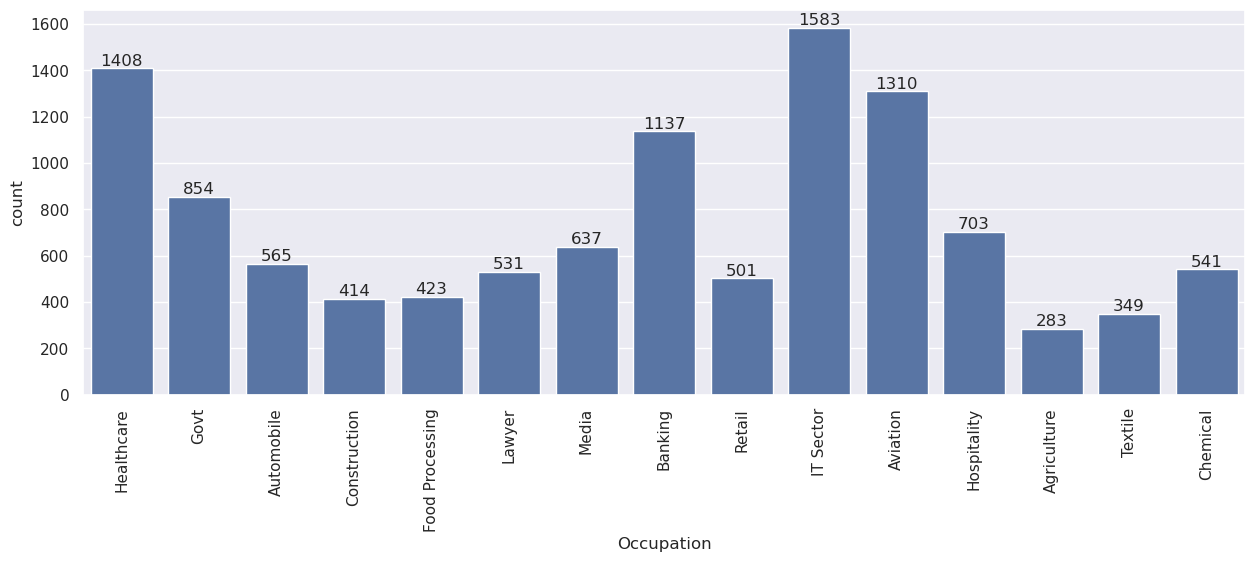

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(data = df,x = 'Occupation')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

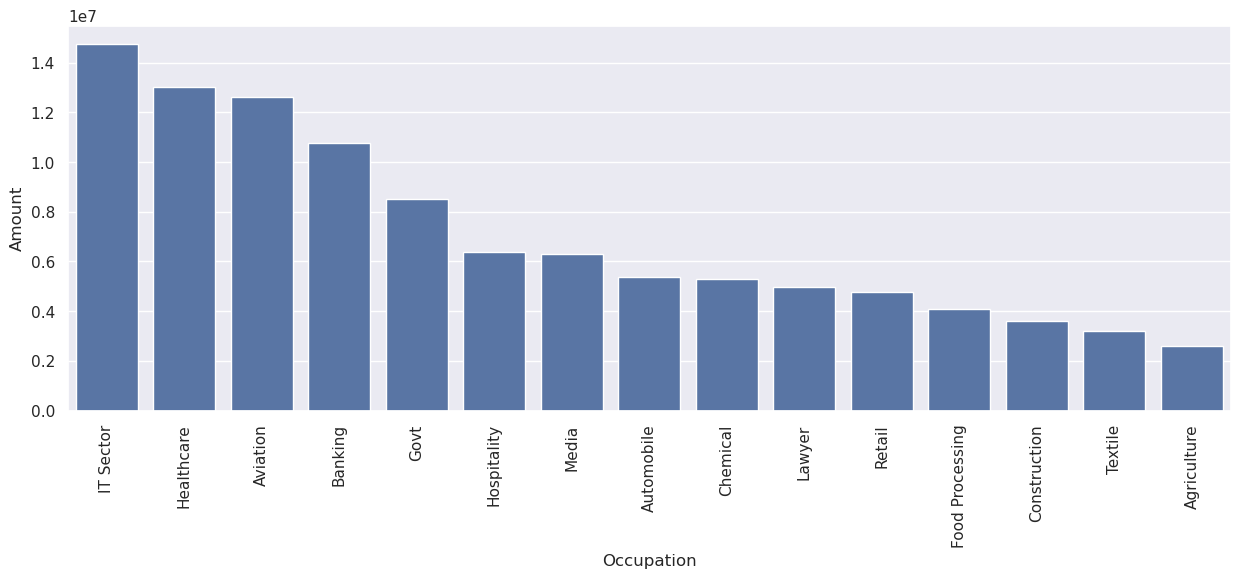

In [23]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
plt.xticks(rotation=90)
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

The purchasing power is of IT sector, HealthCare and Aviation

Product Category

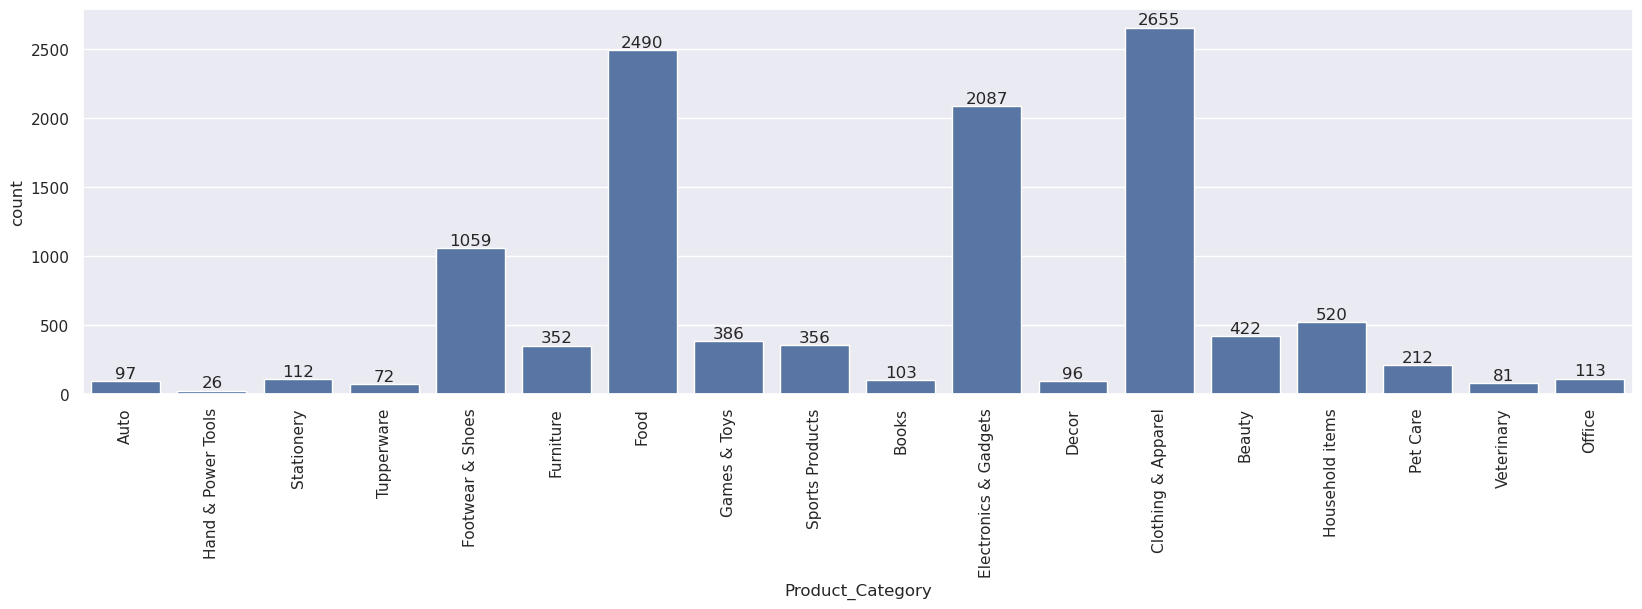

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

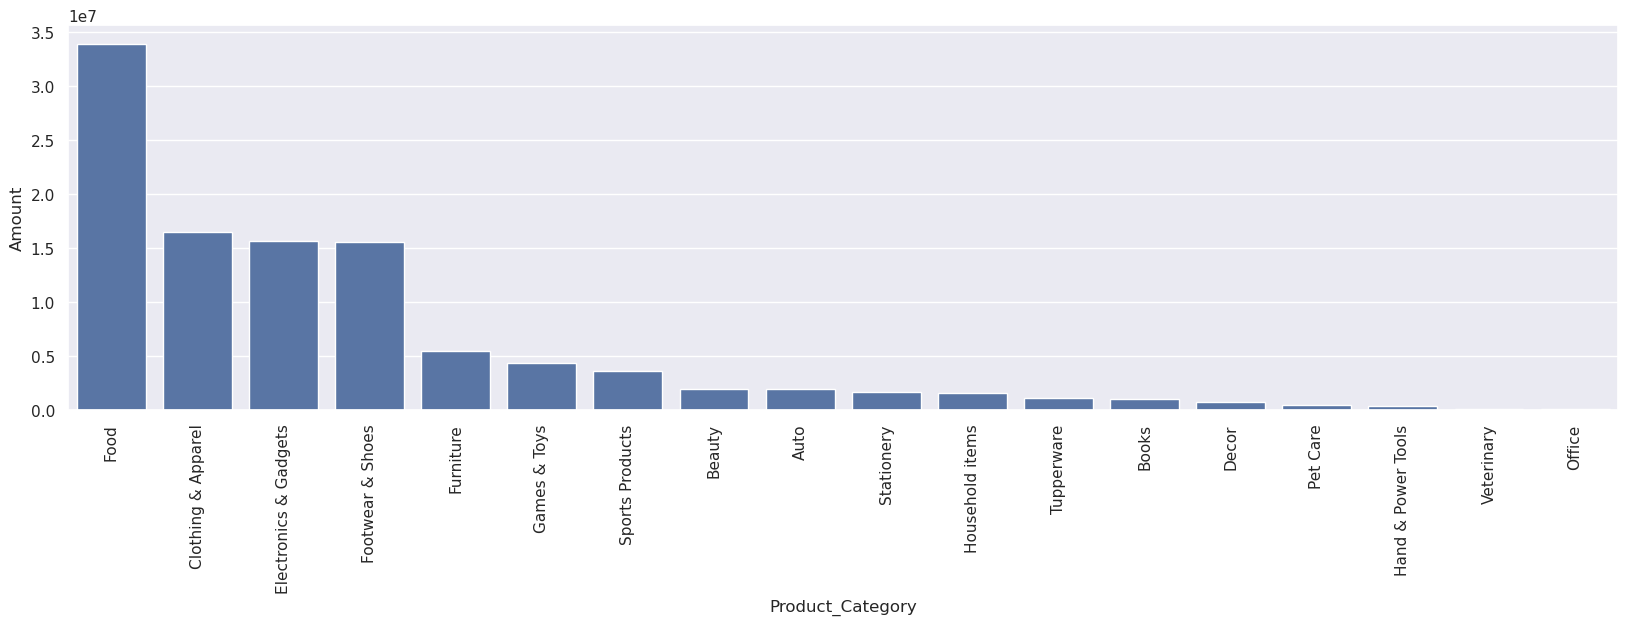

In [35]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')
plt.xticks(rotation = 90)

<Axes: xlabel='Product_ID'>

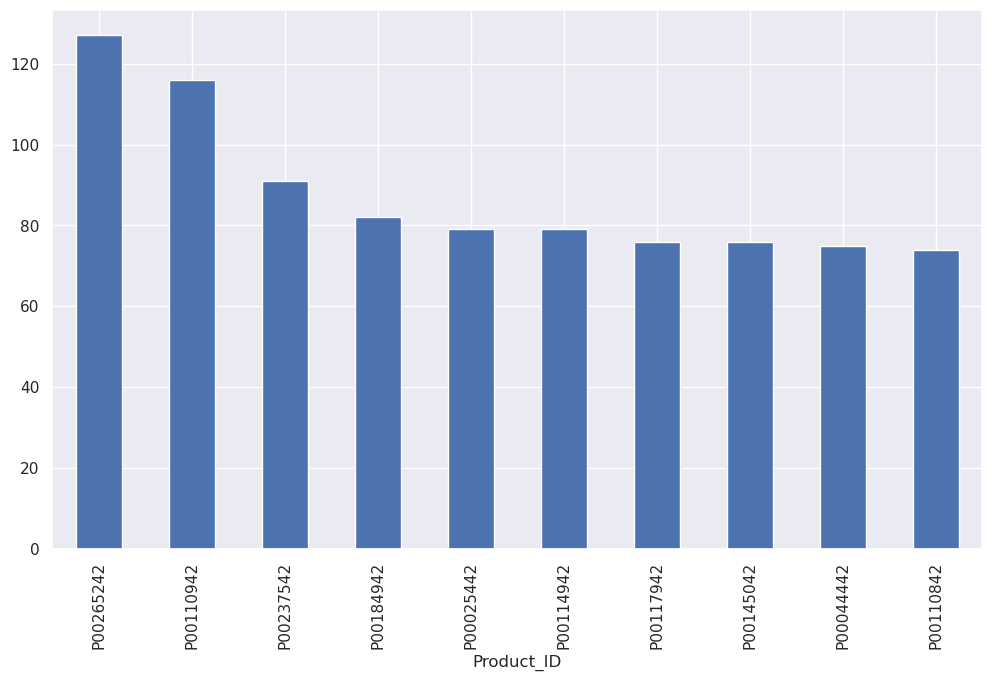

In [40]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')


Conclusion:

-Unmarried women of age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare And Aviation are more likely to buy products form Food, Clothing and Electronics category.